In [2]:
import pandas as pd
import numpy as np

h = 3
s = 5
c = 0.98
itr = int(input("Enter number of iterations: "))
#itr = 50
d=2
l_lim = -5.12
u_lim = 5.12

arr = np.random.uniform(l_lim , u_lim,size=(2,3))

global_best = float('inf')   
all_f_vals = []
best_progress = []
global_best_progress = []

def generate_homes(arr_x1, arr_x2, s):
    h1x1 = np.random.uniform(arr_x1[0][0], arr_x2[0][0], size=(s, 1))
    h1x2 = np.random.uniform(arr_x1[0][1], arr_x2[0][1], size=(s, 1))
    h2x1 = np.random.uniform(arr_x1[0][2], arr_x2[0][2], size=(s, 1))
    h2x2 = np.random.uniform(arr_x1[1][0], arr_x2[1][0], size=(s, 1))
    h3x1 = np.random.uniform(arr_x1[1][1], arr_x2[1][1], size=(s, 1))
    h3x2 = np.random.uniform(arr_x1[1][2], arr_x2[1][2], size=(s, 1))
    return h1x1, h1x2, h2x1, h2x2, h3x1, h3x2

def calculate_fitness_values(h1, h2, h3):
    return np.sum(h1**2, axis=2), np.sum(h2**2, axis=2), np.sum(h3**2, axis=2)

def ISH(z, all_f_vals, s, h):
    if z >= 2:
        f_t   = all_f_vals[z]
        f_t1  = all_f_vals[z-1]
        f_t2  = all_f_vals[z-2]
        numerator   = f_t - f_t1
        denominator = f_t - f_t2
        denominator[denominator == 0] = 1e-8
        return abs(numerator / denominator)
    else:
        return np.random.random(size=(s,h))
    
def Ps1(fitness):
    fitness_1 = 1 / (fitness + 0.0000000001)
    Ps = fitness_1 / np.sum(fitness_1)
    return Ps.flatten()

def selection(Ps):
    indices = np.arange(0, 15)
    selected = np.random.choice(indices, size=15, p=Ps)
    while any(selected[b] == b for b in range(h*s)):
        selected = np.random.choice(indices, size=15, p=Ps)
    return selected
    
def LD1(ish, fun_vals_f, fx_fen, h, s):
    ish_d=1/ish
    ish_d = ish_d.T
    ish_d = ish_d.flatten()

    denom_ld = np.array([fun_vals_f[a] - fx_fen[a] for a in range(h*s)])
    denom_ld_d = 1/(denom_ld + 0.00000001)
    LD = np.array([ish_d[a] * denom_ld_d[a] for a in range(h*s)])
    return LD

def min_max_normalize(LD):
    min_val = np.min(LD)
    max_val = np.max(LD)
    normalized_array = (LD - min_val) / (max_val - min_val)
    return normalized_array

def manual_array(h1x1, h1x2, h2x1, h2x2, h3x1, h3x2):
    h1_l = [[h1x1[0],h1x2[0] ], [h1x1[1],h1x2[1]], 
           [h1x1[2],h1x2[2]], [h1x1[3],h1x2[3]]
           , [h1x1[4],h1x2[4]]]
    h2_l = [[h2x1[0],h2x2[0] ], [h2x1[1],h2x2[1]], 
           [h2x1[2],h2x2[2]], [h2x1[3],h2x2[3]],[h2x1[4],h2x2[4]]]
    h3_l = [[h3x1[0],h3x2[0] ], [h3x1[1],h3x2[1]], 
           [h3x1[2],h3x2[2]], [h3x1[3],h3x2[3]],[h3x1[4],h3x2[4]]]
    h1_h2_h3_l = [[h1x1[0],h1x2[0] ], [h1x1[1],h1x2[1]], 
           [h1x1[2],h1x2[2]], [h1x1[3],h1x2[3]]
           , [h1x1[4],h1x2[4]],[h2x1[0],h2x2[0] ], [h2x1[1],h2x2[1]], 
           [h2x1[2],h2x2[2]], [h2x1[3],h2x2[3]],[h2x1[4],h2x2[4]],[h3x1[0],h3x2[0] ], [h3x1[1],h3x2[1]], 
           [h3x1[2],h3x2[2]], [h3x1[3],h3x2[3]],[h3x1[4],h3x2[4]]]
    return h1_l, h2_l, h3_l, h1_h2_h3_l

def Position_Updated(h , s , NLD , df_h1_h2_h3 , selected):
    for m in range(h*s):
        result = NLD[m]*(df_h1_h2_h3.iloc[m] - df_h1_h2_h3.iloc[selected[m]])
        Sh_up.loc[len(Sh_up)] = result.values
    return Sh_up

def fill_missing_snail(h , arr , l_lim , u_lim):
        if arr.shape[1] < h:
            missing = h - arr.shape[1]
            padding = np.random.uniform(l_lim, u_lim, size=(2, missing))
            arr = np.concatenate((arr, padding), axis=1)
        return arr
        


for z in range(itr):
    #print(arr)
    arr_x1 = arr + c
    arr_x2 = arr - c 
    arr_x1 = np.clip(arr_x1, l_lim, u_lim)
    arr_x2 = np.clip(arr_x2, l_lim, u_lim)

    h1x1, h1x2, h2x1, h2x2, h3x1, h3x2 = generate_homes(arr_x1, arr_x2, s)      #Assign X1 X2 

    h1 = np.stack((h1x1, h1x2), axis=2)
    h2 = np.stack((h2x1 , h2x2), axis=2)
    h3 = np.stack((h3x1 , h3x2), axis=2)

    f_vals1, f_vals2, f_vals3 = calculate_fitness_values(h1, h2, h3)        #Function Values(Sphere Function)

    f_vals = np.stack((f_vals1 , f_vals2 , f_vals3 ) , axis = 2)
    all_f_vals.append(f_vals.copy())

    ish = ISH(z, all_f_vals, s, h)                                             #ISH

    fitness = np.stack((f_vals1 , f_vals2 , f_vals3), axis=2)
    fitness = np.squeeze(fitness, axis=1) 

    Ps = Ps1(fitness)                                                            #PS

    selected = selection(Ps)                                                       #Selection

    fun_vals_f = f_vals.T
    fun_vals_f = fun_vals_f.flatten()

    fx_fen = np.zeros(len(selected))
    fx_fen = np.array([fun_vals_f[i] for i in selected])

    LD = LD1(ish, fun_vals_f, fx_fen, h, s)                                        #Love Dart

    NLD = min_max_normalize(LD)                                                 #Normalization

    # Fixing NLD
    NLD[NLD == 0] += 1e-8
    NLD[NLD == 1] -= 1e-8

    h1_l, h2_l, h3_l, h1_h2_h3_l = manual_array(h1x1, h1x2, h2x1, h2x2, h3x1, h3x2)       #Arrays

    #print(h1_l)
    df_h1 = pd.DataFrame(h1_l, columns =['X1', 'X2'])
    df_h2 = pd.DataFrame(h2_l, columns =['X1', 'X2'])
    df_h3 = pd.DataFrame(h3_l, columns =['X1', 'X2'])
    df_h1_h2_h3 = pd.DataFrame(h1_h2_h3_l, columns =['X1', 'X2'])
    
    Sh_up = pd.DataFrame(columns =['X1', 'X2'])

    Sh_up = Position_Updated(h , s , NLD , df_h1_h2_h3 , selected)         # Updated positions   Sh_up

    Sh_up_fn = np.sum(Sh_up**2, axis=1)
    Sh_up_fn = Sh_up_fn.to_frame(name='Function_Values')

    Sh_upnfn = pd.concat([Sh_up, Sh_up_fn], axis=1)                        #Dataframe wiht X1 X2 and their Function Values

    Sh_upnfn['H'] = np.random.randint(0, 3, size=len(Sh_upnfn))             #New Column "H"  i.e. selected values

    Sh_upnfn['Function_Values'] = Sh_upnfn['Function_Values'].apply(lambda x: x[0])    # values are in [] form (e.g., [3.56]) this line changes it to 3.56 

    min_vals = Sh_upnfn.groupby('H')['Function_Values'].min()               #Groups dataframe by H and find .min minimum from every groupn of H

    best = min_vals.min()                                                   #Stores minimum values from all homes in arr

    min_rows = Sh_upnfn.loc[Sh_upnfn.groupby('H')['Function_Values'].idxmin()]      #Stores whole block of selected minimum value from all homes i.e. x1 x2 fun_val And H

    min_rows['X1'] = min_rows['X1'].apply(lambda x: x[0])                   #Same here values in [] form and are changed to normal 
    min_rows['X2'] = min_rows['X2'].apply(lambda x: x[0])                   #Same here values in [] form and are changed to normal 

    arr = min_rows[['X1', 'X2']].values.T                                   #New arr initialized with positions of new best snails
    ms = fill_missing_snail(h , arr , l_lim , u_lim)
    arr = ms
    if best < global_best:                                                 #Finds Global best
        global_best = best
    best_progress.append(best)
    global_best_progress.append(global_best)
    #print("Function Value:\n", min_vals) #prints best of 3 homes 
    #print("\nFunction Value:\n", min_rows)  #prints whole block of selected minimum value from all homes i.e. x1 x2 fun_val And H
    print(f"Iteration {z+1} : {best}") # prints best from 3 bests of 3 homes
print(f"Global Best : {global_best}") # prints global best from 15 snails

Iteration 1 : 1.8475932129670805e-16
Iteration 2 : 1.1243029422210806e-16
Iteration 3 : 9.843414141511569e-17
Iteration 4 : 7.946675220173871e-17
Iteration 5 : 2.143759039842275e-18
Iteration 6 : 5.016651517049759e-18
Iteration 7 : 2.5514504433896096e-16
Iteration 8 : 5.2978554939273803e-17
Iteration 9 : 7.705400544678497e-17
Iteration 10 : 4.657077151621941e-18
Iteration 11 : 2.42337095814917e-16
Iteration 12 : 1.4373576624116865e-17
Iteration 13 : 3.0632239576568095e-17
Iteration 14 : 1.3084189540262596e-18
Iteration 15 : 5.648106720444817e-17
Iteration 16 : 6.1661791166567e-17
Iteration 17 : 9.418882388707015e-17
Iteration 18 : 1.553770344046673e-16
Iteration 19 : 6.938992713844059e-17
Iteration 20 : 1.6882322174743563e-16
Iteration 21 : 5.621123130593641e-17
Iteration 22 : 5.537807432532769e-16
Iteration 23 : 2.374064048578173e-16
Iteration 24 : 1.5009198937649322e-16
Iteration 25 : 1.1409043671528963e-16
Iteration 26 : 2.874318083727068e-16
Iteration 27 : 3.202417643801277e-19
Ite

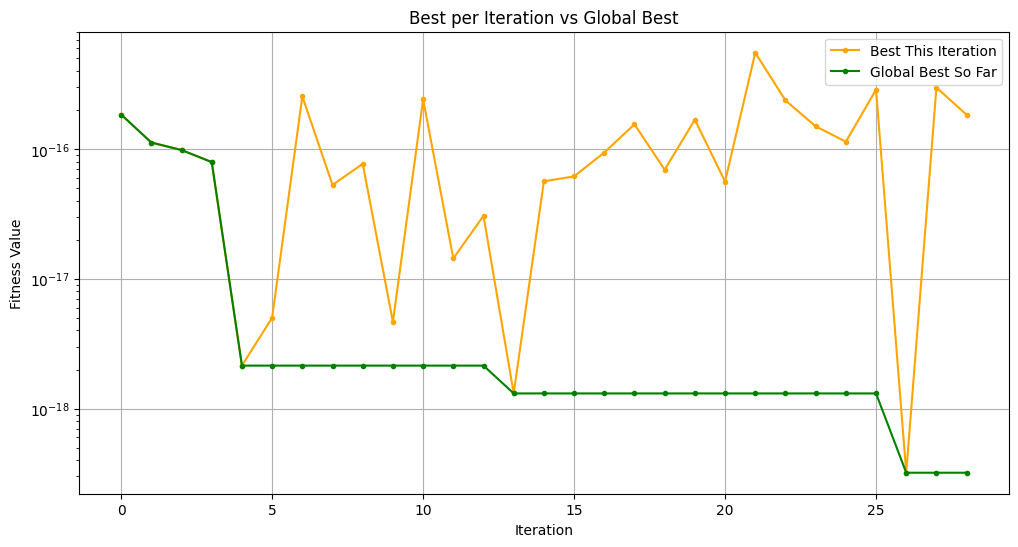

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(best_progress, marker='.', linestyle='-', color='orange', label='Best This Iteration')
plt.plot(global_best_progress, marker='.', linestyle='-', color='green', label='Global Best So Far')
plt.title('Best per Iteration vs Global Best')
plt.xlabel('Iteration')
plt.ylabel('Fitness Value')
plt.yscale('log')
#plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(1)
plt.show()
